# 1. Overview

## Description

**Why This Matters**

Accurate sales forecasts are crucial for planning process, supply chain processes, delivery logistics and inventory management. By optimizing forecasts, we can minimize waste and streamline operations, making our e-grocery services more sustainable and efficient.

**Your Impact**

Your participation in this challenge will directly contribute to Rohlik mission of sustainable and efficient e-grocery delivery. Your insights will help us enhance customer service and achieve a greener future.

We are relaunching the Challenge with prizes.

Rohlik Group, a leading European e-grocery innovator, is revolutionising the food retail industry. We operate across 11 warehouses in Czech Republic, Germany, Austria, Hungary, and Romania.

We are now transitioning from the Rohlik Orders Forecasting Challenge to the Rohlik Sales Forecasting Challenge, as we continue with our set of challenges. This challenge focuses on predicting the sales of each selected warehouse inventory for next 14 days using historical sales data.

## Evaluation

Submissions are evaluated on Weighted Mean Absolute Error (WMAE) between the predicted sales and the actual sales. Weights for the test evaluation can be found in the Data section.

## Submission File

For each ID in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

id,sales_hat

840_2024-06-10,12.01

2317_2024-06-15,13.32

738_2024-06-10,14.12

3894_2024-06-11,3.03

3393_2024-06-08,53.03


## Prizes
Leaderboard prizes

1st place - $4,000

2nd place - $4,000

3rd place - $2,000

## Citation

MichalKecera. Rohlik Sales Forecasting Challenge. https://kaggle.com/competitions/rohlik-sales-forecasting-challenge-v2, 2024. Kaggle.

## Data

## Dataset Description
You are provided with historical sales data for selected Rohlik inventory and date. IDs, sales, total orders and price columns are altered to keep the real values confidential. Some features are not available in test as they are not known at the moment of making the prediction. The task is to forecast the sales column for a given id, constructed from unique_id and date (e. g. id 1226_2024-06-03 from unique_id 1226 and date 2024-06-03), for the test set.



## Files
- **sales_train.csv** - training set containing the historical sales data for given date and inventory with selected features described below
- **sales_test.csv** - full testing set
- **inventory.csv** - additional information about inventory like its product (same products across all warehouses share same product unique id and name, but have different unique id)
- **solution.csv** - full submission file in the correct format
- **calendar.csv** - calendar containing data about holidays or warehouse specific events, some columns are already in the train data but there are additional rows in this file for dates where some warehouses could be closed due to public holiday or Sunday (and therefore they are not in the train set)



## Columns
**sales_train.csv** and **sales_test.csv**

- `unique_id` - unique id for inventory
- `date` - date
- `warehouse` - warehouse name
- `total_orders` - historical orders for selected Rohlik warehouse known also for test set as a part of this challenge
- `sales` - Target value, sales volume (either in pcs or kg) adjusted by availability. The sales with lower availability than 1 are already adjusted to full potential sales by Rohlik internal logic. There might be missing dates both in train and test for a given inventory due to various reasons. This column is missing in test.csv as it is target variable.
- `sell_price_main` - sell price
- `availability` - proportion of the day that the inventory was available to customers. The inventory doesn't need to be available at all times. A value of 1 means it was available for the entire day. This column is missing in test.csv as it is not known at the moment of making the prediction.
- `type_0_discount`, type_1_discount, … - Rohlik is running different types of promo sale actions, these show the percentage of the original price during promo ((original price - current_price) / original_price). Multiple discounts with different type can be run at the same time, but always the highest possible discount among these types is used for sales. Negative discount value should be interpreted as no discount.

**inventory.csv**

- `unique_id` - inventory id for a single keeping unit
- `product_unique_id` - product id, inventory in each warehouse has the same product unique id (same products across all warehouses has the same product id, but different unique id)
- `name` - inventory id for a single keeping unit
L1_category_name, L2_category_name, … - name of the internal category, the higher the number, the more granular information is present
- `warehouse` - warehouse name

**calendar.csv**

- `warehouse` - warehouse name
- `date` - date
- `holiday_name` - name of public holiday if any
- `holiday` - 0/1 indicating the presence of holidays
- `shops_closed` - public holiday with most of the shops or large part of shops closed
- `winter_school_holidays` - winter school holidays
- `school_holidays` - school holidays

**test_weights.csv**

- `unique_id` - inventory id for a single keeping unit
- `weight` - weight used for final metric computation

In [ ]:
# import urllib.request
# import sys

# import csv
# import codecs

# try:
#   ResultBytes = urllib.request.urlopen("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/47.499190541054894%2C%2019.043086682180125/2024-01-01/2024-06-16?unitGroup=metric&include=days&key=PQXJR5FWV2MW5H9MT7FF9YYLR&contentType=csv")

#   # Parse the results as CSV
#   CSVText = csv.reader(codecs.iterdecode(ResultBytes, 'utf-8'))

# except urllib.error.HTTPError  as e:
#   ErrorInfo= e.read().decode()
#   print('Error code: ', e.code, ErrorInfo)
#   sys.exit()
# except  urllib.error.URLError as e:
#   ErrorInfo= e.read().decode()
#   print('Error code: ', e.code,ErrorInfo)
#   sys.exit()

In [ ]:
# import pandas as pd
# budapest_weather = pd.DataFrame(CSVText)
# budapest_weather.to_csv('weather/budapest_weather_2024.csv')

In [ ]:
# budapest_weather_2020 = pd.read_csv('weather/budapest_weather_2020.csv')
# budapest_weather_2021 = pd.read_csv('weather/budapest_weather_2021.csv')
# budapest_weather_2022 = pd.read_csv('weather/budapest_weather_2022.csv')
# budapest_weather_2023 = pd.read_csv('weather/budapest_weather_2023.csv')
# budapest_weather_2024 = pd.read_csv('weather/budapest_weather_2024.csv')

# budapest_weather = pd.concat([budapest_weather_2020,
#                               budapest_weather_2021,
#                               budapest_weather_2022,
#                               budapest_weather_2023,
#                               budapest_weather_2024],
#                               ignore_index=True)

# budapest_weather.to_csv('weather/budapest_weather.csv')

# 2. Import & Merging

Mount Drive if in a Colab environment

In [28]:
# from google.colab import drive
# drive.mount('/content/drive')

Import packages and tables

In [29]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [30]:
path = r''

sales_train = pd.read_csv(f'{path}sales_train.csv')
sales_test = pd.read_csv(f'{path}sales_test.csv')
weights = pd.read_csv(f'{path}test_weights.csv')
calendar = pd.read_csv(f'{path}calendar.csv')
inventory = pd.read_csv(f'{path}inventory.csv')
solution = pd.read_csv(f'{path}solution.csv')
prague_weather = pd.read_csv(f'{path}weather/prague_weather.csv', index_col=False)
brno_weather = pd.read_csv(f'{path}weather/brno_weather.csv', index_col=False)
frankfurt_weather = pd.read_csv(f'{path}weather/frankfurt_weather.csv', index_col=False)
munich_weather = pd.read_csv(f'{path}weather/munich_weather.csv', index_col=False)
budapest_weather = pd.read_csv(f'{path}weather/budapest_weather.csv', index_col=False)

Concat `sales_train` and `sales_test`. This process will make feature engineering simpler and the `sales_df` can be split further.

`sales_train`: max date = 2024-06-02

`sales_test`: min date = 2024-06-03

OBS: Drop the `availability` column in the `sales_train` is necessary, as well as NaN values.

In [31]:
# drop availability column
sales_train.drop(columns=['availability'], axis=1, inplace=True)

# drop 52 rows with NA values
sales_train.dropna(inplace=True)

# concat sales dataframes
sales_df = pd.concat([sales_train,
                     sales_test],
                     ignore_index=True)

Renaming weather columns

In [32]:
for i, df in enumerate([prague_weather,
                        brno_weather,
                        frankfurt_weather,
                        munich_weather,
                        budapest_weather]):

    df = df.rename(columns={'datetime': 'date'})

    # Assign back to the corresponding variable
    if i == 0:
        prague_weather = df
    if i == 1:
        brno_weather = df
    elif i == 2:
        frankfurt_weather = df
    elif i == 3:
        munich_weather = df
    elif i == 4:
        budapest_weather = df

Converting to Datetime

In [33]:
for i, df in enumerate([sales_df,
                        calendar,
                        prague_weather,
                        brno_weather,
                        frankfurt_weather,
                        munich_weather,
                        budapest_weather]):

    df['date'] = pd.to_datetime(df['date'])

    # Assign back to the corresponding variable
    if i == 0:
        sales_df = df
    elif i == 1:
        calendar = df
    elif i == 2:
        prague_weather = df
    elif i == 3:
        brno_weather = df
    elif i == 4:
        frankfurt_weather = df
    elif i == 5:
        munich_weather = df
    elif i == 6:
        budapest_weather = df

Defining the begining of the `sales_test`

In [34]:
min_test_date = pd.to_datetime(sales_test['date'].min())

Merging tables

In [35]:
# calendar
sales_df = sales_df.merge(calendar, on=['date', 'warehouse'], how='left')

# inventory
sales_df = sales_df.merge(inventory, on=['unique_id', 'warehouse'], how='left')

In [36]:
# Dictionary to map warehouse to country
warehouse_to_country = {
    'Prague': 'Czech Republic',
    'Brno': 'Czech Republic',
    'Budapest': 'Hungary',
    'Munich': 'Germany',
    'Frankfurt': 'Germany'
}

# Create country column based on warehouse
sales_df['country'] = sales_df['warehouse'].str.split('_').str[0].map(warehouse_to_country)

# Create discount column by selecting max discount value across discount columns
discount_cols = [col for col in sales_df.columns if col.startswith('type_') and col.endswith('_discount')]
sales_df['discount'] = sales_df[discount_cols].max(axis=1)

# Extract date features
sales_df['year'] = sales_df['date'].dt.year
sales_df['month'] = sales_df['date'].dt.month
sales_df['day'] = sales_df['date'].dt.day
sales_df['weekday'] = sales_df['date'].dt.day_of_week
sales_df['day_of_year'] = sales_df['date'].dt.day_of_year
sales_df['date_weekofyear'] = sales_df['date'].dt.isocalendar().week
sales_df['is_weekend'] = sales_df['date'].dt.dayofweek.isin([5, 6]).astype(int)

# Define Season Mapping
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

# Map Months to Seasons
sales_df['season'] = sales_df['month'].map(season_mapping)

# Fill NaN values in the 'holiday_name' column
sales_df['holiday_name'].fillna('Not holiday', inplace=True)

# Apply sales binning only where `date` is before `min_test_date`
sales_df['sell_price_main_bins'] = pd.qcut(sales_df['sell_price_main'], q=4, labels=False)

In [37]:
# Warehouse to City Mapping
warehouse_city_map = {
    'Budapest_1': 'Budapest',
    'Prague_2': 'Prague',
    'Brno_1': 'Brno',
    'Prague_1': 'Prague',
    'Prague_3': 'Prague',
    'Munich_1': 'Munich',
    'Frankfurt_1': 'Frankfurt'
}

# Weather DataFrames Dictionary (assuming all have the same structure)
weather_dfs = {
    'Prague': prague_weather,
    'Brno': brno_weather,
    'Frankfurt': frankfurt_weather,
    'Munich': munich_weather,
    'Budapest': budapest_weather
    # Add other weather DataFrames as needed
}

# Ensure all DataFrames have the correct date format
for df in [sales_train, sales_test] + list(weather_dfs.values()):
    df['date'] = pd.to_datetime(df['date']).dt.normalize()

# Merge all weather DataFrames into one, keeping the city column
merged_weather = pd.concat([
    weather_dfs[city].assign(city=city) for city in weather_dfs
], ignore_index=True)


# Map warehouse to city and drop rows with unknown warehouses
sales_df['city'] = sales_df['warehouse'].map(warehouse_city_map)
sales_df = sales_df.dropna(subset=['city'])  # Drop rows where city is NaN

# Merge sales data with weather data
sales_df = sales_df.merge(merged_weather, on=['date', 'city'], how='left')

Creating a `days_to_holiday` column

In [38]:
# Create a dictionary of sorted holiday dates per warehouse
holiday_dict = {
    warehouse: pd.to_datetime(group[group['holiday'] == 1]['date']).sort_values().to_numpy()
    for warehouse, group in calendar.groupby('warehouse')
}

# Generate a lookup table for all combinations of warehouse and date
all_dates = pd.concat([sales_train[['warehouse', 'date']], sales_test[['warehouse', 'date']]]).drop_duplicates()
all_dates['date'] = pd.to_datetime(all_dates['date'])

def calculate_days_to_next_holiday(row):
    warehouse = row['warehouse']
    current_date = row['date']
    holiday_dates = holiday_dict.get(warehouse, np.array([]))  # Get holidays for the warehouse
    future_holidays = holiday_dates[holiday_dates > current_date]
    if future_holidays.size > 0:
        return (future_holidays[0] - current_date).days
    return None

# Vectorize by applying the function on the lookup table
all_dates['days_to_holiday'] = all_dates.apply(calculate_days_to_next_holiday, axis=1)

# Merge the precomputed lookup table back into sales_train and sales_test
sales_df = sales_df.merge(all_dates, on=['warehouse', 'date'], how='left')

Creating multiple new features

In [39]:
# Vectorized approach using numpy
conditions = [
    (sales_df['precip'] > 10),
    (sales_df['precip'] > 2.5) & (sales_df['precip'] <= 10),
    (sales_df['precip'] > 0) & (sales_df['precip'] <= 2.5),
    (sales_df['precip'] == 0)
]

choices = ['Heavy', 'Moderate', 'Light', 'None']

# Use np.select() to assign values based on conditions
sales_df['precip_intensity'] = np.select(conditions, choices, default='None')

In [40]:
sales_df['hotday'] = np.where(sales_df['feelslike'] > 25, 1, 0)  # 1 if temp > 25°C, else 0
sales_df['coldday'] = np.where(sales_df['feelslike'] < 0, 1, 0)  # 1 if temp < 0°C, else 0

In [41]:
sales_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [42]:
sales_df.head().T

,0,1,2,3,4
unique_id,4845,4845,4845,4845,4845
date,2024-03-10 00:00:00,2021-05-25 00:00:00,2021-12-20 00:00:00,2023-04-29 00:00:00,2022-04-01 00:00:00
warehouse,Budapest_1,Budapest_1,Budapest_1,Budapest_1,Budapest_1
total_orders,6436.0,4663.0,6507.0,5463.0,5997.0
sales,16.34,12.63,34.55,34.52,35.92
...,...,...,...,...,...
stations,"12847099999,12843099999,12846099999,E3429,LHBP...","12847099999,12843099999,12846099999,1284009999...","12847099999,12843099999,12846099999,1284009999...","12847099999,12843099999,12846099999,1284009999...","12847099999,12843099999,12846099999,1284009999..."
days_to_holiday,5,87,4,2,14
precip_intensity,Light,Light,None,Light,Moderate
hotday,0,0,0,0,0


# Working with only one warehouse

Following the suggestion of professor Mark Cassar, we will start working with only one warehouse. Prague_1 was selected, as it has the largest number of observations.

In [16]:
sales_df = sales_df[sales_df['warehouse'] == 'Prague_1']

# Prediction Model


In [17]:
train = sales_df[sales_df['date'] < min_test_date]
test = sales_df[sales_df['date'] >= min_test_date]

Check the balance of the training set

sell_price_main_bins
1    264275
2    259341
0    142856
3    114094
Name: count, dtype: int64


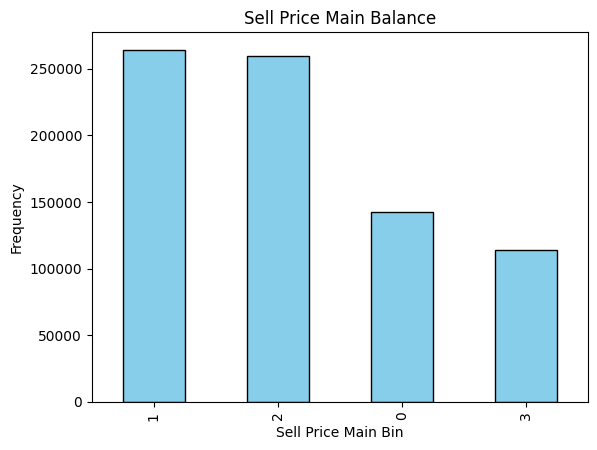

In [19]:
# checking the balance of the dataframe
train_balance = train['sell_price_main_bins'].value_counts()

# Display the balance
print(train_balance)

# Optionally, plot the balance
train_balance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sell Price Main Balance')
plt.xlabel('Sell Price Main Bin')
plt.ylabel('Frequency')
plt.show()

## Preprocessing


In [20]:
random_state = 1910

In [21]:
X = train[['unique_id', 'warehouse', 'total_orders',
          'sell_price_main', 'type_0_discount', 'type_2_discount',
          'product_unique_id', 'name_x', 'L2_category_name_en',
          'L3_category_name_en', 'L4_category_name_en', 'country', 
          'discount', 'weekday', 'day_of_year',
          'date_weekofyear', 'city', 'name_y',
          'sunrise', 'sunset', 'stations', 
          'days_to_holiday', 'sell_price_main_bins']]
y = train['sales']

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

#fi and transform the remaining categorical variables
for i in X.select_dtypes('object').columns:
        X[i] = le.fit_transform(X[[i]])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.20, random_state=random_state)

In [17]:
# from sklearn.preprocessing import OrdinalEncoder

# # Initialize the OrdinalEncoder
# oe = OrdinalEncoder(categories=[['None', 'Light', 'Moderate', 'Heavy']])  # Specify the order if necessary

# # Fit and transform the 'precip_intensity' column
# sales_df['precip_intensity'] = oe.fit_transform(sales_df[['precip_intensity']])

## 5.2 Regressor Model

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
                        # n_estimators=200,
                        # max_depth=30,
                        random_state=random_state)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1910)

In [25]:
from sklearn.metrics import mean_absolute_error

predictions = rf.predict(X_val)
mae = mean_absolute_error(y_val, predictions)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  23.442926485132656


In [26]:
# Compute WMAE
def calculate_wmae(actual, predicted, weights):
    return np.sum(weights * np.abs(actual - predicted)) / np.sum(weights)
calculate_wmae(y_val, predictions, weights['weight'])

0.4660066491917483

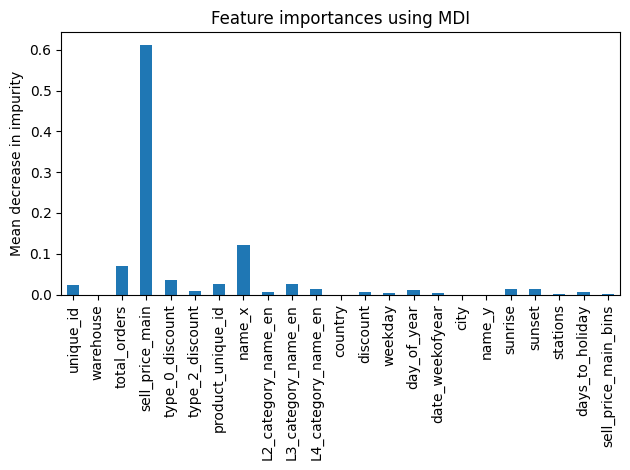

In [27]:
#check feature importance
reg_importances = pd.DataFrame(rf.feature_importances_, X.columns)
fig, ax = plt.subplots()
reg_importances.plot.bar(ax=ax, legend=False)
ax.set_title("Feature importances using MDI")  # mean decrease in impurity
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Export / Load Model with Joblib

In [ ]:
import joblib  # or simply `import joblib` in newer versions

In [ ]:
# # Export
# # Assuming `rf` is your trained model
# joblib.dump(rf, f'rf_model_mae_{round(mae, 2)}.pkl')
# print("Model saved successfully!")

In [ ]:
# # import
# rf = joblib.load(r"D:\Data Analytics for Business\Term 4 - 2025 Winter\rf_model_mae_19.38.pkl")
# print("Model loaded successfully!")

Model loaded successfully!


## 5.3 XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Train XGBoost model
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=30,
    learning_rate=0.1,
    random_state=random_state
)

model.fit(X_train, y_train)

# Evaluate the model
preds = model.predict(X_val)
mae = mean_absolute_error(y_val, preds)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 21.056514918206304


In [ ]:
# Compute WMAE
def calculate_wmae(actual, predicted, weights):
    return np.sum(weights * np.abs(actual - predicted)) / np.sum(weights)
calculate_wmae(y_val, preds, weights['weight'])

3.3542492606750116

### Randomized Search


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distribution
param_dist = {
    "learning_rate": np.linspace(0.01, 0.3, 10),
    "max_depth": np.arange(3, 10),
    "n_estimators": np.arange(50, 300, 50),
    # "subsample": [0.6, 0.8, 1.0],
    # "colsample_bytree": [0.6, 0.8, 1.0]
}

# Initialize XGBoost Regressor
xgb_reg = XGBRegressor(objective="reg:squarederror")

# Randomized Search
random_search = RandomizedSearchCV(xgb_reg, param_dist,
                                   n_iter=20, cv=5,
                                   scoring="neg_mean_squared_error", n_jobs=-1,
                                   random_state=random_state)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

### Grid Search CV


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],           # Number of trees in the forest
    'max_depth': [10, 20, 30, None],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],           # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features considered for splitting
    'bootstrap': [True, False],                # Whether bootstrap samples are used
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1  # Use all available CPUs
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 30, 'n_estimators': 200}


# 6. Solution

In [ ]:
# drop date from test
sales_test.drop(columns=['date'], axis=1, inplace=True)

In [ ]:
# predict test
solution['sales_hat'] = rf.predict(sales_test).round(2)

In [ ]:
#Export final solution
solution.to_csv(f'{path}solution_mae{round(mae, 2)}.csv', index=False)

In [ ]:
solution.head()

,id,sales_hat
0,1226_2024-06-03,19.09
1,1226_2024-06-11,152.21
2,1226_2024-06-13,147.68
3,1226_2024-06-15,116.61
4,1226_2024-06-09,26.00


In [ ]:
print(sales_train['date'].max())
print(sales_train['date'].min())
print(sales_test['date'].max())
print(sales_test['date'].min())


2024-06-02
2020-08-01
2024-06-16
2024-06-03
